# Labels for all 

Now that we have identified some famous paintings, we also want to know what the other illustrations are about. We use the AI Vision tool from Google Cloud Platform.

In [449]:
import io
import os
import glob
import pandas as pd
# Imports the Google Cloud client library
from google.cloud import vision
from tqdm import tqdm
from IPython.display import Image
from collections import OrderedDict
import math
import json
import shutil

## Get all labels

In [33]:
all_illus = glob.glob("./not_known_paintings/*.jpg")

In [34]:
# Instantiates a client
client = vision.ImageAnnotatorClient()
data = []
for illu in tqdm(all_illus):
    # The name of the image file to annotate
    file_name = os.path.abspath(illu)

    # Loads the image into memory
    with io.open(file_name, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    # Performs label detection on the image file
    response = client.label_detection(image=image)
    labels = response.label_annotations
    label_dict = {}
    for label in labels:
        label_dict[label.description] = label.score

    data.append({'id': file_name.split('/')[-1].split('.')[0], 'labels': label_dict})

100%|██████████| 8939/8939 [45:23<00:00,  3.28it/s]  


In [35]:
pd.DataFrame(data).to_csv('labels_illus.csv', index = False)

## Clean labels

We do not care about every label. For example, if an illustration has 'face', 'hair' and 'painting' as labels, only 'painting' will be interesting for us. We create a list of categories that we will keep, and keep only the most probable one if an illustration has multiple of them.

In [187]:
df = pd.read_csv('labels_illus.csv').drop(columns=['Unnamed: 0'])

In [188]:
df['labels'] = df.apply(lambda row: json.loads(row['labels'].replace("\'",  "\"").replace("Devil\"s bridge", "Devil's bridge")), axis=1)

In [45]:
sample['labels'].iloc[0].values()

dict_values([0.8674045205116272, 0.8297051191329956, 0.7919973134994507, 0.78399258852005, 0.7828050255775452, 0.7783575057983398, 0.7736456990242004, 0.7537399530410767, 0.7286262512207031, 0.7257824540138245])

ILLU_11508_28_1
dict_keys(['Forehead', 'Nose', 'Cheek', 'Head', 'Chin', 'Hairstyle', 'Eyebrow', 'Sculpture', 'Statue', 'Jaw'])


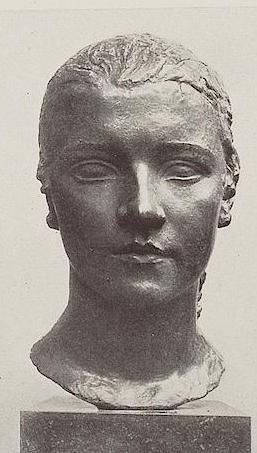

In [381]:
sample = df.sample()
print(sample['id'].iloc[0])
kws = dict(sample['labels'].iloc[0]).keys()
print(kws)
Image(filename='./not_known_paintings/' + sample['id'].iloc[0] + '.jpg') 

In [294]:
categories = OrderedDict({'Sculpture': 0, 'Reproduction': 0, 'Object': 0, 'Ornament': 0, 'Plan' : 0, 
              'Architecture/Decoration' : 0, 'Photography' : 0})
#cat_keywords = [dict(), dict(), dict(), dict(), dict(), dict(), dict()]

In [295]:
def add_object(d_cats, d_kw, predictions, actual_class):
    #d_cats[actual_class] = d_cats.get(actual_class, 0) + 1
    for p in predictions:
        d_kw[list(d_cats).index(actual_class)][p] = d_kw[list(d_cats).index(actual_class)].get(p, 0) + 1

In [382]:
add_object(categories, cat_keywords, kws, 'Sculpture')

In [383]:
cat_keywords

[{'Head': 3,
  'Sleeve': 3,
  'Art': 48,
  'Headgear': 4,
  'Painting': 14,
  'Monument': 4,
  'Vintage clothing': 7,
  'Illustration': 11,
  'Drawing': 12,
  'Costume design': 1,
  'Working animal': 1,
  'Organism': 2,
  'Gesture': 26,
  'Terrestrial animal': 1,
  'Camel': 1,
  'Adaptation': 2,
  'Creative arts': 2,
  'Elephant': 1,
  'Monochrome': 6,
  'Jaw': 16,
  'Wall': 1,
  'Knee': 8,
  'Trunk': 19,
  'Chest': 19,
  'Artifact': 24,
  'Abdomen': 2,
  'Human leg': 7,
  'Wood': 6,
  'Statue': 19,
  'Sculpture': 27,
  'Classical sculpture': 12,
  'Nose': 4,
  'Chin': 6,
  'Beard': 2,
  'No expression': 2,
  'Facial hair': 2,
  'Metal': 4,
  'Visual arts': 16,
  'Human body': 8,
  'Elbow': 3,
  'Eyelash': 2,
  'Iris': 2,
  'Self-portrait': 1,
  'Plant': 3,
  'Tree': 2,
  'Temple': 5,
  'Standing': 2,
  'Black-and-white': 1,
  'Style': 2,
  'Grass': 1,
  'Leg': 6,
  'Thigh': 2,
  'Calf': 1,
  'Waist': 4,
  'Font': 10,
  'Facade': 1,
  'Rock': 1,
  'Paper': 2,
  'Printmaking': 2,
  'Fur

In [385]:
cat_keywords = [{'Head': 3,
  'Sleeve': 3,
  'Art': 48,
  'Headgear': 4,
  'Painting': 14,
  'Monument': 4,
  'Vintage clothing': 7,
  'Illustration': 11,
  'Drawing': 12,
  'Costume design': 1,
  'Working animal': 1,
  'Organism': 2,
  'Gesture': 26,
  'Terrestrial animal': 1,
  'Camel': 1,
  'Adaptation': 2,
  'Creative arts': 2,
  'Elephant': 1,
  'Monochrome': 6,
  'Jaw': 16,
  'Wall': 1,
  'Knee': 8,
  'Trunk': 19,
  'Chest': 19,
  'Artifact': 24,
  'Abdomen': 2,
  'Human leg': 7,
  'Wood': 6,
  'Statue': 19,
  'Sculpture': 27,
  'Classical sculpture': 12,
  'Nose': 4,
  'Chin': 6,
  'Beard': 2,
  'No expression': 2,
  'Facial hair': 2,
  'Metal': 4,
  'Visual arts': 16,
  'Human body': 8,
  'Elbow': 3,
  'Eyelash': 2,
  'Iris': 2,
  'Self-portrait': 1,
  'Plant': 3,
  'Tree': 2,
  'Temple': 5,
  'Standing': 2,
  'Black-and-white': 1,
  'Style': 2,
  'Grass': 1,
  'Leg': 6,
  'Thigh': 2,
  'Calf': 1,
  'Waist': 4,
  'Font': 10,
  'Facade': 1,
  'Rock': 1,
  'Paper': 2,
  'Printmaking': 2,
  'Furniture': 1,
  'Table': 2,
  'Sports equipment': 1,
  'Rectangle': 3,
  'Rolling': 1,
  'Tail': 1,
  'Fictional character': 2,
  'Sitting': 3,
  'Monochrome photography': 5,
  'Military person': 1,
  'Woody plant': 1,
  'Stock photography': 1,
  'History': 2,
  'Clay': 1,
  'Tints and shades': 2,
  'Circle': 1,
  'Vertebrate': 1,
  'Chair': 2,
  'Mammal': 1,
  'Musical instrument': 1,
  'Photograph': 1,
  'Serveware': 1,
  'Meditation': 1,
  'Hairstyle': 2,
  'Neck': 5,
  'Still life photography': 1,
  'Lip': 1,
  'Eyebrow': 2,
  'Arm': 4,
  'Pedestal': 1,
  'Happy': 1,
  'Event': 1,
  'Formal wear': 1,
  'Shorts': 1,
  'Dress': 1,
  'One-piece garment': 1,
  'Day dress': 1,
  'Fashion design': 1,
  'Dog': 1,
  'Carnivore': 1,
  'Desk': 1,
  'Poster': 1,
  'String instrument': 1,
  'Folk instrument': 1,
  'flute': 1,
  'Soldier': 1,
  'Forehead': 2,
  'Cheek': 2,
  'Personal protective equipment': 1,
  'Stomach': 1,
  'Synthetic rubber': 1,
  'Automotive design': 1,
  'Automotive tire': 1,
  'Composite material': 1,
  'Carmine': 1,
  'Ink': 1,
  'Figure drawing': 1,
  'Terrain': 1,
  'Human anatomy': 1},
 {'Outerwear': 2,
  'Facial expression': 3,
  'Jaw': 13,
  'Sleeve': 16,
  'Art': 102,
  'Painting': 69,
  'Drawing': 50,
  'Illustration': 54,
  'Sitting': 7,
  'Vintage clothing': 22,
  'Dog breed': 2,
  'Carnivore': 2,
  'Dog': 1,
  'Big cats': 1,
  'Working animal': 5,
  'Snout': 1,
  'Terrestrial animal': 2,
  'Cloud': 5,
  'Sky': 6,
  'Plant community': 2,
  'Natural landscape': 5,
  'Tree': 23,
  'Landscape': 14,
  'Tints and shades': 19,
  'Monochrome': 30,
  'Font': 35,
  'Visual arts': 47,
  'Plant': 18,
  'Ink': 1,
  'Fictional character': 4,
  'Printmaking': 9,
  'Rectangle': 20,
  'Grass': 7,
  'Pattern': 12,
  'Monochrome photography': 13,
  'Arm': 5,
  'Muscle': 2,
  'Human body': 7,
  'Neck': 3,
  'Chest': 8,
  'Trunk': 9,
  'Abdomen': 2,
  'Barechested': 2,
  'Paper': 3,
  'Line art': 4,
  'Slope': 7,
  'Mountain': 3,
  'Terrain': 2,
  'Rural area': 2,
  'Formation': 1,
  'Geological phenomenon': 1,
  'Wood': 17,
  'Grey': 3,
  'Automotive tire': 3,
  'Motor vehicle': 2,
  'Metal': 2,
  'Twig': 4,
  'Event': 4,
  'History': 18,
  'Pole': 1,
  'Forehead': 6,
  'Face': 3,
  'Cheek': 5,
  'Chin': 3,
  'Hairstyle': 3,
  'Smile': 2,
  'Eye': 1,
  'Organ': 1,
  'Black': 7,
  'Triangle': 1,
  'Black-and-white': 4,
  'Style': 5,
  'Line': 4,
  'Road surface': 1,
  'Parallel': 3,
  'Room': 4,
  'Building': 8,
  'Tower': 2,
  'Facade': 3,
  'Steeple': 1,
  'Medieval architecture': 1,
  'Spire': 1,
  'Paper product': 1,
  'Holy places': 3,
  'Nose': 2,
  'Hair': 6,
  'Gesture': 11,
  'Self-portrait': 2,
  'Organism': 18,
  'Mythology': 1,
  'Stock photography': 13,
  'Botany': 3,
  'Branch': 3,
  'Chair': 6,
  'Military organization': 1,
  'Military person': 1,
  'Water': 3,
  'Body of water': 1,
  'Bird': 1,
  'Watercourse': 1,
  'Lake': 2,
  'Adaptation': 6,
  'Arecales': 1,
  'Coastal and oceanic landforms': 1,
  'Horizon': 1,
  'Serveware': 1,
  'Circle': 6,
  'Drinkware': 1,
  'Beard': 3,
  'Figure drawing': 5,
  'Facial hair': 3,
  'Helmet': 2,
  'People in nature': 6,
  'Personal protective equipment': 2,
  'Hat': 4,
  'Grassland': 2,
  'Head': 4,
  'Lip': 3,
  'Brown': 1,
  'Artifact': 2,
  'Beige': 1,
  'Woody plant': 1,
  'Book': 1,
  'Office equipment': 3,
  'Publication': 2,
  'Classic': 1,
  'Office supplies': 1,
  'Headgear': 4,
  'Eyebrow': 3,
  'Vertebrate': 5,
  'Mammal': 3,
  'Musical instrument': 2,
  'Dishware': 1,
  'Automotive wheel system': 1,
  'Creative arts': 3,
  'Space': 1,
  'Picture frame': 2,
  'Tail': 2,
  'Paint': 1,
  'Photograph': 4,
  'Textile': 2,
  'People': 1,
  'Snapshot': 3,
  'Ecoregion': 1,
  'Bedrock': 1,
  'Artwork': 4,
  'Wall': 1,
  'City': 1,
  'Sun hat': 1,
  'House': 4,
  'White': 1,
  'Nature': 1,
  'Natural environment': 1,
  'Boat': 2,
  'Watercraft': 2,
  'Fence': 1,
  'Boats and boating--Equipment and supplies': 2,
  'Cottage': 1,
  'Human': 1,
  'Graphics': 1,
  'Symbol': 1,
  'Collar': 2,
  'Blazer': 2,
  'Suit': 2,
  'Still life photography': 1,
  'Sculpture': 1,
  'Arch': 1,
  'Elbow': 3,
  'Human leg': 3,
  'Wrist': 1,
  'Clothing': 1,
  'Leg': 6,
  'Day dress': 1,
  'Waist': 1,
  'Victorian fashion': 2,
  'Fashion design': 2,
  'Handwriting': 2,
  'Crew': 2,
  'Team': 1,
  'Window': 2,
  'Pack animal': 1,
  'Conquistador': 1,
  'Petal': 1,
  'Flower': 2,
  'Automotive design': 1,
  'Storage basket': 1,
  'Basket': 1,
  'Poster': 1,
  'Coat': 1,
  'Formal wear': 1,
  'Knee': 5,
  'Furniture': 1,
  'Still life': 2,
  'Keyboard': 1,
  'Terrestrial plant': 1,
  'Evergreen': 1,
  'Machine': 1,
  'Desk': 1,
  'Stencil': 1,
  'Sketch': 1,
  'Portrait': 2,
  'Hand': 2,
  'Art paint': 1,
  'Pollinator': 1,
  'Coloring book': 1,
  'Thigh': 3,
  'Ancient history': 1,
  'Footwear': 1,
  'Product': 1,
  'Dress': 2,
  'Fur': 1,
  'Standing': 1,
  'Headpiece': 1,
  'Conifer': 1,
  'Gown': 1,
  'Vehicle': 1,
  'Naval architecture': 1,
  'Mast': 1,
  'Musician': 1},
 {'White': 5,
  'Black': 8,
  'Body jewelry': 2,
  'Symmetry': 3,
  'Artifact': 10,
  'Jewellery': 2,
  'Metal': 9,
  'Art': 15,
  'Circle': 6,
  'Pattern': 4,
  'Vase': 5,
  'Creative arts': 4,
  'Serveware': 10,
  'Pottery': 3,
  'earthenware': 1,
  'Monochrome photography': 4,
  'Sculpture': 1,
  'Painting': 3,
  'Wood': 3,
  'Ceramic': 1,
  'Illustration': 2,
  'Drawing': 1,
  'Beak': 1,
  'Tableware': 8,
  'Stemware': 2,
  'Drinkware': 8,
  'Liquid': 3,
  'Barware': 2,
  'Water': 1,
  'Fluid': 1,
  'Champagne stemware': 1,
  'Rectangle': 2,
  'Font': 8,
  'Ornament': 1,
  'Fashion accessory': 3,
  'Visual arts': 3,
  'Candle': 1,
  'Cylinder': 1,
  'Gas': 2,
  'Glass': 3,
  'Laboratory equipment': 1,
  'Sugar substitute': 1,
  'Flowerpot': 3,
  'Antique': 1,
  'Vehicle': 1,
  'Wheel': 1,
  'Dishware': 4,
  'Mixing bowl': 1,
  'Cookware and bakeware': 1,
  'Event': 1,
  'Photograph': 3,
  'Light': 2,
  'Wine glass': 1,
  'Plant': 2,
  'Houseplant': 1,
  'Flower': 1,
  'Twig': 1,
  'Tree': 1,
  'Terrestrial plant': 1,
  'Stock photography': 1,
  'Grey': 1,
  'Material property': 1,
  'Tints and shades': 3,
  'Electric blue': 1,
  'Magenta': 1,
  'Plastic': 1,
  'Watch': 1,
  'Clock': 1,
  'Quartz clock': 1,
  'Watch accessory': 1,
  'Measuring instrument': 1,
  'Analog watch': 1,
  'Plate': 1,
  'Porcelain': 1,
  'Lid': 1,
  'Line': 2,
  'Glass bottle': 1,
  'Cross': 1,
  'Religious item': 1,
  'Symbol': 1,
  'Monochrome': 3,
  'Music': 1,
  'Still life photography': 1},
 {'Textile': 2,
  'Font': 23,
  'Material property': 4,
  'Symmetry': 11,
  'Art': 25,
  'Motif': 3,
  'Pattern': 17,
  'Illustration': 17,
  'Visual arts': 13,
  'Rectangle': 15,
  'Botany': 4,
  'Organism': 8,
  'Circle': 8,
  'Drawing': 14,
  'Head': 3,
  'Vertebrate': 4,
  'Line': 4,
  'Crest': 1,
  'Painting': 11,
  'Paper': 2,
  'Line art': 5,
  'Design': 3,
  'Paper product': 2,
  'Mammal': 3,
  'Monochrome': 2,
  'History': 1,
  'Printmaking': 2,
  'Sketch': 2,
  'Building': 2,
  'Cartoon': 1,
  'Facade': 1,
  'Sports equipment': 2,
  'Picture frame': 3,
  'Player': 2,
  'Helmet': 2,
  'Brick': 2,
  'Wood': 2,
  'Sculpture': 2,
  'Plant': 3,
  'Symbol': 3,
  'Jaw': 1,
  'Gesture': 1,
  'Ear': 1,
  'Tail': 2,
  'Snout': 1,
  'Fish': 1,
  'Arch': 1,
  'Column': 1,
  'Tower': 1,
  'Creative arts': 1,
  'White': 2,
  'Triangle': 1,
  'Terrestrial plant': 1,
  'Flowerpot': 1,
  'Black': 1,
  'Style': 1,
  'Publication': 1,
  'Document': 1,
  'Poster': 1,
  'Brand': 2,
  'Logo': 1,
  'Graphics': 1,
  'Signage': 1,
  'Sign': 1,
  'Electric blue': 1,
  'Number': 1,
  'Darkness': 1,
  'Rodent': 1,
  'Terrestrial animal': 1},
 {'Slope': 2,
  'Parallel': 2,
  'Circle': 1,
  'Bass banjo': 1,
  'Font': 2,
  'Drawing': 1,
  'Diagram': 1,
  'Rectangle': 2,
  'Measuring instrument': 1,
  'Home accessories': 1,
  'Product': 1,
  'Schematic': 1,
  'Line': 1,
  'Material property': 1,
  'Pattern': 1,
  'Plan': 1},
 {'Black': 10,
  'Building': 28,
  'Interior design': 11,
  'Black-and-white': 10,
  'Style': 5,
  'Wood': 11,
  'Curtain': 1,
  'Chair': 15,
  'Monochrome': 16,
  'Monochrome photography': 11,
  'Snapshot': 1,
  'Arcade': 2,
  'Arch': 3,
  'Column': 3,
  'Property': 6,
  'Furniture': 11,
  'Room': 4,
  'Classic': 3,
  'Rectangle': 25,
  'Window': 12,
  'Sky': 5,
  'Facade': 14,
  'City': 3,
  'Urban design': 5,
  'Mixed-use': 1,
  'Parallel': 4,
  'Art': 14,
  'Font': 6,
  'Symmetry': 3,
  'Metal': 2,
  'Desk': 3,
  'Table': 12,
  'Machine': 2,
  'Still life photography': 1,
  'Temple': 1,
  'Monument': 1,
  'Ancient history': 1,
  'History': 3,
  'Plant': 5,
  'Architecture': 3,
  'Fixture': 3,
  'Land lot': 1,
  'House': 10,
  'Material property': 1,
  'Slope': 3,
  'Tints and shades': 15,
  'Hall': 4,
  'Living room': 1,
  'Couch': 2,
  'Floor': 2,
  'Flooring': 2,
  'Line': 4,
  'Tree': 2,
  'Photograph': 3,
  'Houseplant': 2,
  'Display case': 1,
  'Composite material': 2,
  'Picture frame': 4,
  'Automotive lighting': 1,
  'Motor vehicle': 2,
  'Outdoor furniture': 2,
  'Cloud': 3,
  'Tower': 1,
  'Turret': 1,
  'Tower block': 1,
  'Vehicle': 1,
  'Lighting': 3,
  'Grille': 1,
  'Automotive exterior': 1,
  'Pattern': 1,
  'Shelving': 1,
  'Ceiling': 1,
  'Grey': 1,
  'Wall': 1,
  'Vault': 1,
  'Stool': 1,
  'Coffee table': 1,
  'Shade': 1,
  'Glass': 1,
  'Passenger ship': 1,
  'Musical instrument': 1,
  'Wheel': 1,
  'White': 1,
  'Tire': 1,
  'Car': 1,
  'Decoration': 1,
  'Tablecloth': 1,
  'Stairs': 1,
  'Concrete': 1,
  'Comfort': 1,
  'Bed frame': 1,
  'Textile': 1,
  'Lamp': 1},
 {'Photograph': 2,
  'Building': 5,
  'Black': 4,
  'Line': 2,
  'Art': 9,
  'Monochrome': 7,
  'Tints and shades': 5,
  'Monochrome photography': 6,
  'Snapshot': 1,
  'Door': 1,
  'Coat': 1,
  'Sleeve': 3,
  'Headgear': 3,
  'Beard': 2,
  'Vintage clothing': 4,
  'Facial hair': 2,
  'Hat': 1,
  'Collar': 2,
  'Blazer': 1,
  'Sky': 2,
  'White': 2,
  'Black-and-white': 5,
  'Style': 3,
  'House': 1,
  'City': 1,
  'Outerwear': 2,
  'Flat cap': 1,
  'Cap': 2,
  'Moustache': 1,
  'Grey': 3,
  'Wall': 1,
  'Wood': 5,
  'Facade': 1,
  'Font': 3,
  'Rectangle': 5,
  'Picture frame': 2,
  'Painting': 3,
  'Pattern': 2,
  'Visual arts': 3,
  'Illustration': 3,
  'History': 2,
  'Stairs': 1,
  'Road surface': 1,
  'Flooring': 1,
  'Parallel': 1,
  'Asphalt': 1,
  'Window': 2,
  'Brickwork': 1,
  'Brick': 2,
  'Holy places': 1,
  'Table': 1,
  'Room': 1,
  'Drawing': 2,
  'Arch': 1,
  'Arcade': 1,
  'Slope': 1,
  'Mountain': 1,
  'Highland': 1,
  'Landscape': 1,
  'Mountainous landforms': 1,
  'Geological phenomenon': 1,
  'Hill': 1,
  'Gesture': 1,
  'One-piece garment': 1,
  'Darkness': 1,
  'Architecture': 1,
  'Tree': 1,
  'Twig': 1,
  'Snow': 1,
  'Smile': 1,
  'Wool': 1,
  'Costume hat': 1,
  'Happy': 1,
  'Woolen': 1}]

In [386]:
for d in cat_keywords:
    if 'Art' in d.keys():
        d.pop('Art') 

In [387]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
dataset = [' '.join([' '.join([d[0] for i in range(d[1])]) for d in dkw.items()]) for dkw in cat_keywords]

tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(dataset)
df_tfidf = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df_tfidf = df_tfidf.sort_values('TF-IDF', ascending=False)
most_important_kw = list(df_tfidf.iloc[:100].index)

/Users/elisamichelet/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [388]:
for d in cat_keywords:
    for k in list(d.keys()):
        if str.lower(k) not in most_important_kw:
            d.pop(k) 

In [389]:
priors = [sum(x.values()) for x in cat_keywords]
priors = [p/sum(priors) for p in priors]

In [390]:
priors_smooth = [0.25, 0.3, 0.1, 0.1, 0.05, 0.1, 0.1]

In [391]:
likelihood = dict()
for dkw in cat_keywords:
    likelihood = {**likelihood, **dkw}
likelihood = {k: v / total for total in (sum(likelihood.values()),) for k, v in likelihood.items()}

In [392]:
normalized_cat_kw = cat_keywords.copy()
for d in normalized_cat_kw:
    for kw in d.keys():
        d[kw] = d[kw]/sum(d.values())

In [393]:
cats = ['Sculpture', 'Reproduction', 'Object', 'Ornament', 'Plan', 
             'Architecture/Decoration', 'Photography']

In [435]:
def most_likely_category(labels, probas):
    scores = []
    for c in range(len(normalized_cat_kw)):
        # Bayes probability
        s = sum([normalized_cat_kw[c].get(kw, 0.00001) * probas[i] / likelihood.get(kw, 0.00001)  for i, kw in enumerate(labels)])/len(labels)*priors_smooth[c]
        scores.append(s)
    # <0.4 -> doute
    # deux premier très proches (<0.2 d'écart) -> doute
    # plusieurs >0.8 -> doutes
    doubt = max(scores) < 0.4 or len([e for e in scores if e > 0.8]) > 1 or (sorted(scores)[-1] - sorted(scores)[-2]) < 0.2
    return cats[scores.index(max(scores))], doubt

dict_keys(['Art', 'Painting', 'Illustration', 'Drawing', 'Visual arts', 'Automotive tire', 'Wood', 'Sketch', 'Printmaking', 'Artwork'])
[0.382626937510259, 1.0569544610048907, 0.24310375845126397, 0.7271240497740763, 0.13684538454783182, 0.06538410211246683, 0.6353390065217152]
('Reproduction', False)


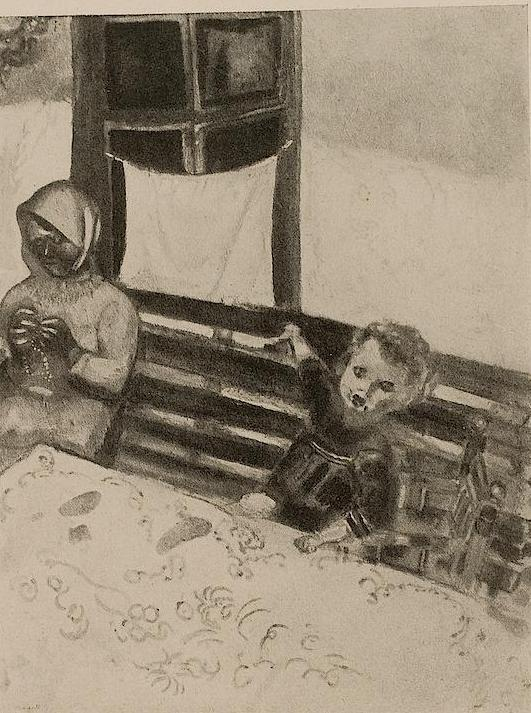

In [431]:
sample = df.sample()
kws = sample['labels'].iloc[0].keys()
probas = sample['labels'].iloc[0].values()
print(kws)
print(most_likely_category(list(kws), list(probas)))
Image(filename='./not_known_paintings/' + sample['id'].iloc[0] + '.jpg') 

In [436]:
df['pred_cat'] = df.apply(lambda row: most_likely_category(list(row['labels'].keys()), list(row['labels'].values()))[0], axis=1)

In [438]:
df['doubt'] = df.apply(lambda row: most_likely_category(list(row['labels'].keys()), list(row['labels'].values()))[1], axis=1)

In [445]:
df.groupby(['doubt', 'pred_cat']).count()

id  labels
doubt pred_cat                             
False Architecture/Decoration   336     336
      Object                      7       7
      Reproduction             2986    2986
      Sculpture                 411     411
True  Architecture/Decoration   543     543
      Object                    132     132
      Ornament                    3       3
      Reproduction             3909    3909
      Sculpture                 612     612

In [446]:
df[df['doubt']]

,id,labels,pred_cat,doubt
0,ILLU_10666_456_0,"{'Branch': 0.873672604560852, 'Plant': 0.84544...",Architecture/Decoration,True
1,ILLU_13393_239_0,"{'Nose': 0.9835830330848694, 'Hair': 0.9831954...",Sculpture,True
3,ILLU_15649_0_1,"{'Font': 0.8286866545677185, 'Material propert...",Object,True
4,ILLU_13384_250_0,"{'Jaw': 0.8793831467628479, 'Sculpture': 0.860...",Sculpture,True
6,ILLU_14410_182_0,"{'Plant': 0.9316926598548889, 'Nature': 0.8997...",Reproduction,True
...,...,...,...,...
8929,ILLU_10558_110_0,"{'Photograph': 0.9415414929389954, 'Art': 0.85...",Reproduction,True
8930,ILLU_10575_169129_0,"{'Nose': 0.9835830330848694, 'Arm': 0.94429284...",Reproduction,True
8935,ILLU_11353_257_3,"{'Jaw': 0.8789311051368713, 'Gesture': 0.85260...",Reproduction,True
8936,ILLU_14941_159_0,"{'Gesture': 0.852604866027832, 'Grey': 0.84144...",Reproduction,True


In [453]:
df['pred_cat'] = df.apply(lambda row: 'Architecture_decoration' if row['pred_cat'] == 'Architecture/Decoration' else row['pred_cat'], axis=1)

In [461]:
def copy_file(im_id, pred):
    shutil.copyfile('not_known_paintings/' + im_id + '.jpg' , pred + '/' + im_id + '.jpg')
    return True

In [466]:
df_op = pd.DataFrame()
df_op['id'] = df[df['doubt']]['id']
df_op['copied'] = df[df['doubt']].apply(lambda row: copy_file(row['id'], row['pred_cat']), axis=1)

# Category Label

In [486]:
objects = [n.split('/')[-1].split('.jpg')[0] for n in glob.glob("./Object/*.jpg")]
sculpture = [n.split('/')[-1].split('.jpg')[0] for n in glob.glob("./Sculpture/*.jpg")]
archideco = [n.split('/')[-1].split('.jpg')[0] for n in glob.glob("./Architecture_decoration/*.jpg")]
onrament = [n.split('/')[-1].split('.jpg')[0] for n in glob.glob("./Ornament/*.jpg")]
photography = [n.split('/')[-1].split('.jpg')[0] for n in glob.glob("./Photography/*.jpg")]
plan = [n.split('/')[-1].split('.jpg')[0] for n in glob.glob("./Plan/*.jpg")]
repro = [n.split('/')[-1].split('.jpg')[0] for n in glob.glob("./Reproduction/*.jpg")]

In [479]:
final_cats_df = df[df['doubt'] == False].drop(columns=['labels', 'doubt'])

,id,pred_cat
2,ILLU_14351_140_4,Reproduction
5,ILLU_11283_315_0,Reproduction
8,ILLU_11581_152_0,Reproduction
9,ILLU_11300_759_1,Reproduction
10,ILLU_15410_398_1,Reproduction
...,...,...
8931,ILLU_15501_8_1,Architecture_decoration
8932,ILLU_13298_67_0,Sculpture
8933,ILLU_10944_367_0,Reproduction
8934,ILLU_10953_136_1,Sculpture


In [482]:
def add_category_to_df(cat_name, illu_list, df):
    return df.append(pd.DataFrame([{'id' : illu, 'pred_cat' : cat_name} for illu in illu_list]))

In [487]:
final_cats_df = df[df['doubt'] == False].drop(columns=['labels', 'doubt'])
final_cats_df = add_category_to_df('Sculpture', sculpture, final_cats_df)
final_cats_df = add_category_to_df('Architecture_decoration', archideco, final_cats_df)
final_cats_df = add_category_to_df('Ornament', onrament, final_cats_df)
final_cats_df = add_category_to_df('Photography', photography, final_cats_df)
final_cats_df = add_category_to_df('Object', objects, final_cats_df)
final_cats_df = add_category_to_df('Plan', plan, final_cats_df)
final_cats_df = add_category_to_df('Reproduction', repro, final_cats_df)
final_cats_df

,id,pred_cat
2,ILLU_14351_140_4,Reproduction
5,ILLU_11283_315_0,Reproduction
8,ILLU_11581_152_0,Reproduction
9,ILLU_11300_759_1,Reproduction
10,ILLU_15410_398_1,Reproduction
...,...,...
3354,ILLU_10558_110_0,Reproduction
3355,ILLU_10575_169129_0,Reproduction
3356,ILLU_11353_257_3,Reproduction
3357,ILLU_14941_159_0,Reproduction


In [489]:
final_cats_df.to_csv('final_pred_cat.csv', index=False)